In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
accuracy = 0.88
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= accuracy): # Experiment with changing this value
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True


clothing = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = keras.Sequential([
    keras.layers.con
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Label: 3


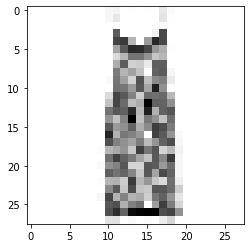

In [ ]:
index=300
plt.imshow(test_images[index], cmap='Greys')
print("Label: " +str(test_labels[index]))

In [ ]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output to softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs:{sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')



input to softmax function: [[1. 3. 4. 2.]]
output to softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs:1.0
class with highest probability: 2


In [ ]:
callbacks = myCallback()
model.compile(optimizer= tf.optimizers.Adam(), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs= 10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3554 - accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4563 - accuracy: 0.8487
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.4346 - accuracy: 0.8569
Reached 85% accuracy so cancelling training!
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4357 - accuracy: 0.8568


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8552


[0.39751631021499634, 0.8551999926567078]

[0,   1,   2,   3,   4,   5,   6,   7,   8,   9   ]
[30.7  0.1  6.2  4.1  1.4  0.  56.2  0.   1.3  0. ]
Label: 0. T-Shirt


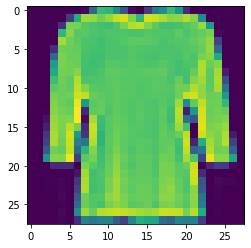

In [ ]:
index = 155
prediction = model.predict(test_images)
print("[0,   1,   2,   3,   4,   5,   6,   7,   8,   9   ]")
print(np.round(prediction[index]*100,1))
label = test_labels[index]
labels = ["0. T-Shirt", "1. Trouser", "2. Pullover", "3. Dress", "4. Coat", "5. Sandals", "6. Shirt", "7. Sneaker", "8. Bag", "9. Ankle Boots"]
print("Label: "+ labels[label])
plt.imshow(test_images[index])